<a id='0'></a>

# Metody analizy i wizualizacji danych z wykorzystaniem Pythona
### Bartosz Ciołek ID:83534<br/>


## Założenia projektu:<br/>
A. Zbadanie możliwości analizy danych z użyciem biblioteki pandas<br/>
B. Zbadanie możliwości wizualizacji danych przy użyciu bibliotek seaborn i matplotlib.pyplot<br/>
C. Prezentacja wyników przy pomocy Jupyter notebook<br/>

## Spis treści: <br/>
[1. Załadowanie danych](#1)<br/>
[2. Analiza ramki danych](#2)<br/>
[3. Wstępna analiza zbioru danych](#3)<br/>
[4. Wizualizacja](#4)<br/>
    <ul>[Rozkład](#5)<br/>
    [Kumulata](#6)<br/>
    [Korelacja](#7)<br/>
    [Wyartości odstające](#8)<br/>
    [Wartości brakujące](#9)<br/>
    [Wykres punktowy](#10)<br/>
    [Wykresy dwuzmiennowe](#11)<br/>
    [Wykresy skrzypcowe](#12)<br/>
    
[5. Bibliografia](#13)<br/>
    

<a id='1'></a>

### 1. Załadowanie danych [&uarr;](#0)
Do analizy użyto zbioru danych dotyczący czerwonego wina.<br/>
Dane można wczytywać bezpośrednio z folderu na dysku:<br/>

In [453]:
import pandas as pd
data = pd.read_csv("C:\\Users\\caspa\\Downloads\\red-wine-quality-bayes-master\\red-wine-quality.csv",
                   sep=',',
                   names=["Fixed","Volatile", "Citric", "Sugar", "Chlorides", "Free", "Total", "Density", "pH", "Sulphates", "Alcohol", "Quality" ])

Dane w pliku nie mają nagłówków, więc te dodane zostały kodem powyżej.<br/>
Bardziej uniwersalnym podejściem jest odniesienie się do pliku na stronie web:<br/>

In [454]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                  sep=';')

W pliku na stwonie separatorem jest średnik.<br/>
Przydatną metodą na sprawdzenie poprawności zczytania danych jest wyświetlenie pierwszych wierszy:<br/>

In [455]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Liczbę wierszy można kontrolować:

In [456]:
data.head(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<a id='2'></a>

### 2. Analiza ramki danych [&uarr;](#0)
Spróbujmy znaleźć kilka podstawowych informacji na temat tej ramki danych.<br/>
Liczba wierszy i kolumn:

In [457]:
data.shape

(1599, 12)

Wartości nagłówków:

In [458]:
data.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

Lista wszystkich wartości, rodzaje danych w kolumnach, występowanie wartości null, użycie pamięci:

In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Raport bez informacji dot wartości pustych

In [460]:
data.info(verbose=True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Krótszy raport, przydatny w przypadku ramek danych z wieloma kolumnami:

In [461]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Columns: 12 entries, fixed acidity to quality
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Poniżej liczba elementów zbioru:

In [462]:
data.size

19188

<a id='3'></a>

### 3. Wstępna analiza zbioru danych [&uarr;](#0)
Spróbujmy wykorzystać pakiet pandas do analizy statystycznej zbioru danych.<br/>
Maksymalne i minimalne wartości osiągane przez dane:

In [463]:
data.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [464]:
data.min()

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

Średnie wartości osiągane przez dane:

In [465]:
data.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

Indeks wskazujący na pierwsze wystąpienie maksymalnej wartości w danej kolumnie:

In [466]:
data.idxmax(axis=0)

fixed acidity            652
volatile acidity        1299
citric acid              151
residual sugar           480
chlorides                258
free sulfur dioxide     1244
total sulfur dioxide    1081
density                 1434
pH                      1316
sulphates                151
alcohol                  652
quality                  267
dtype: int64

Pakiet Pandas umożliwia również sprawdzenie wybranej wartości z tabelki:

In [467]:
data.at[1300,'fixed acidity']


5.2

Poniżej tabela przedstawiająca standardowe statystyczne cechy zbioru danych:

In [468]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Możliwe jest sterowanie wynikami. W poniższej wersji wybrano inne interesujące nas percentyle.<br/> 
Wyłączono również kolumny zawierające wartości zmiennoprzecinkowe.

In [469]:
data.describe(percentiles=[.12,.67,.89], exclude=float)

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
12%,5.000000
50%,6.000000
67%,6.000000
89%,7.000000
max,8.000000


<a id='4'></a>

### 4. Wizualizacja [&uarr;](#0)

W środowisku Python dane można wizualizować za pomocą różnych pakietów.
Celem tego rozdziału jest zaprezentowanie różnych możliwości wizualizacji i wypróbowanie efektów ewentualnych modyfikacji kodu.<br>
Pierwszym krokiem potrzebnym do analizy jest ściągnięcie odpowiednich pakietów:</br>

In [470]:
import seaborn as sns
import matplotlib.pyplot as plt

<a id='5'></a>

### Rozkład [&uarr;](#0)

Spróbujmy uzyskać wykres rozkładu cechy 'citric acid":

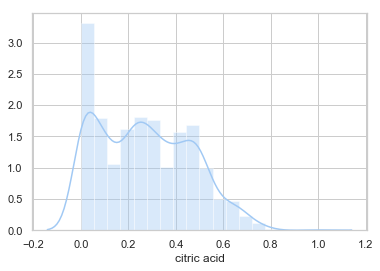

In [471]:
sns.distplot(data['citric acid'])

Spróbujmy przeprowadzić następujące modyfikacje do wykresu:<br>
- wykres ma kolor żółty
- histogram ma być niewidoczny
- wykres ma być w orientacji poziomej
- nadajmy nazwę osi X
- naddajmy legendę do całego wykresu
- wskażmy stałą oczekiwaną wartość
- nadajmy mu tytuł

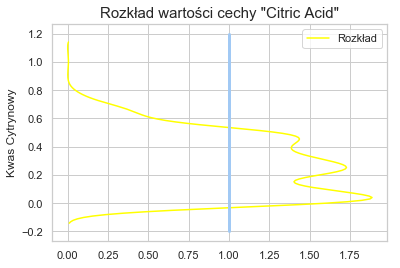

In [472]:
sns.distplot(data['citric acid'],
             hist=False,
             vertical=True,
             color="yellow",
            label="Rozkład",
            axlabel="Kwas Cytrynowy")
plt.title('Rozkład wartości cechy "Citric Acid"', size=15)
plt.plot([1, 1], [1.20, -0.2], linewidth=3,)


Spróbujmy uzyskać bardziej więcej informacji na jednej wizualizacji

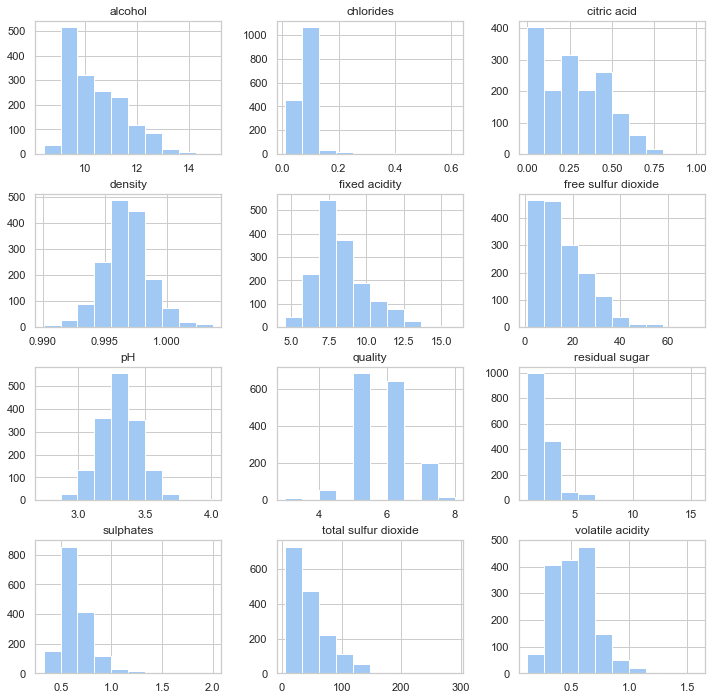

In [473]:
data.hist(figsize=(12,12))
plt.show()

Spróbujmy przeprowadzić następujące modyfikacje do wykresu:
- Wykresy mają być czerwone
- Powinna być widoczna kumulata
- Potrzebne są jedynie informacje na temat zmiennych alcohol, density i quality

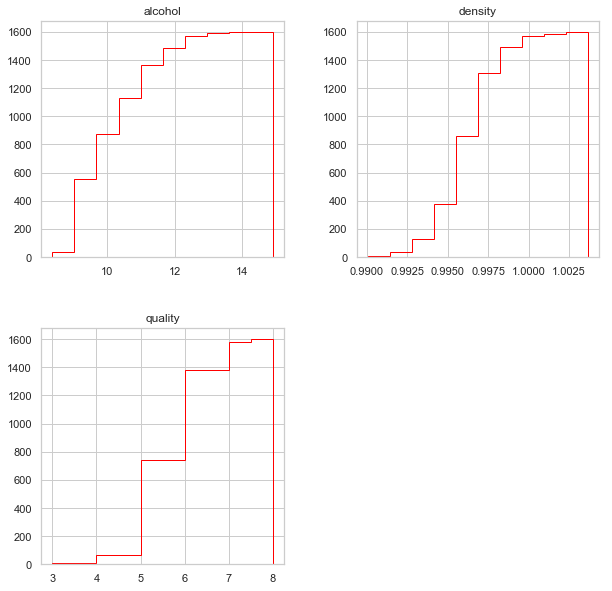

In [474]:
dane=data[['alcohol','density','quality']]
dane.hist(figsize=(10,10),
         color='red',
         histtype='step',
         cumulative=True)
plt.show()

<a id='6'></a>

### Kumulata [&uarr;](#0)

Biblioteka Seaborn pozwala również na zbudowanie kumulaty:

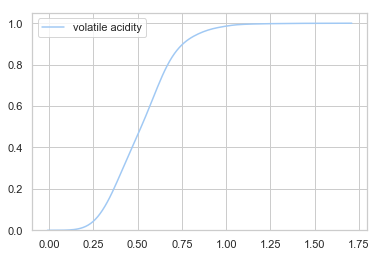

In [475]:
sns.kdeplot(data['volatile acidity'],  
            cumulative=True)

Wykres można modyfikować, przykładowo:<br>
- nadając tytuł
- wyłączając legendę
- zmieniając kolor
- ukrywając siatkę w tle

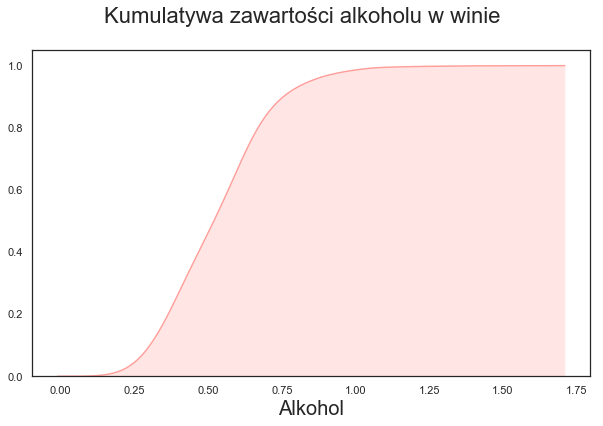

In [502]:
fig = plt.figure( figsize=(10,6) )
title = fig.suptitle("Kumulatywa zawartości alkoholu w winie", fontsize=22)
sns.set_style("white")

ax1 = fig.add_subplot(111)
ax1.set_xlabel("Alkohol", size=20)
#ax1.grid(False) - ten fragment wyłącza siatkę w tle - nie jest poprzedny, jeśli ustawilismy style jako 'white'


sns.kdeplot(data['volatile acidity'], 
            ax=ax1, 
            shade=True,
            legend=False,
            cumulative=True,
            color='r')

<a id='7'></a>

### Korelacja [&uarr;](#0)

Pakiet sns pozwala na wyrysowanie mapy cieplnej korelacji między zmiennymi:

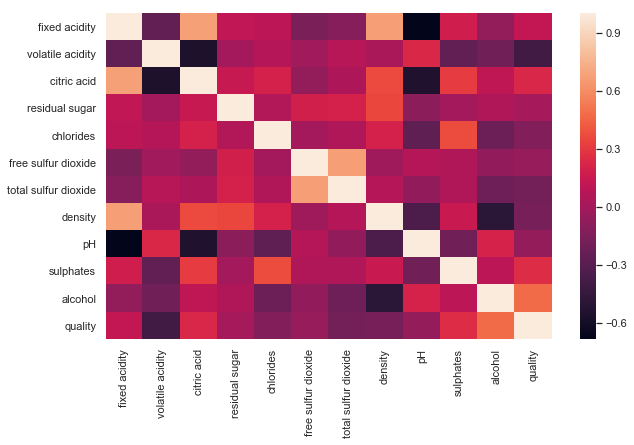

In [477]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

Poniżej przykłady możliwych modyfikacji:
- ustawmy korelacje od największej do najmniejszej względem zmiennej quality
- w każdej komórce wstawmy wartość korelacji
- wstawmy czarne obramowanie dla każdej komórki
- wykres powinien być ustawiony poziomo

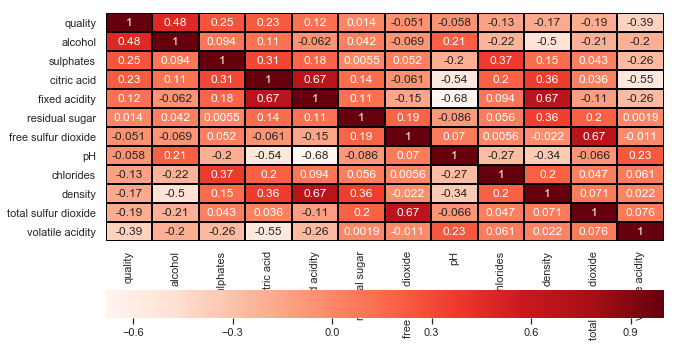

In [478]:
plt.figure(figsize=(10,6))
i = 12
cols = data.corr().nlargest(i, 'quality')['quality'].index

sns.heatmap(data[cols].corr(),
            annot=True,
            cmap = 'Reds',
            linewidths=True,
            linecolor="Black",
            cbar_kws={"orientation": "horizontal"})

<a id='8'></a>

### Wartości Odstające [&uarr;](#0)

Wartości odstające w danym zbiorze danych można zwiazualizować na kilka sposobów:<br>
- możemy posłużyć się wykresem punktowym (dwa wymiary):

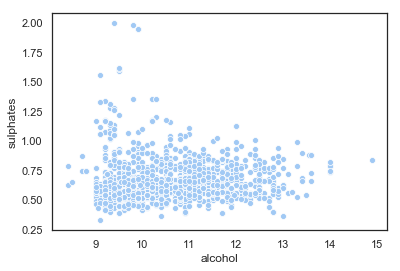

In [479]:
sns.scatterplot(x="alcohol", y="sulphates", data=data)

- W wypadku pojedynczej kolumny, dobrym sposobem jest wyrysowanie wykresu pudełkowego:

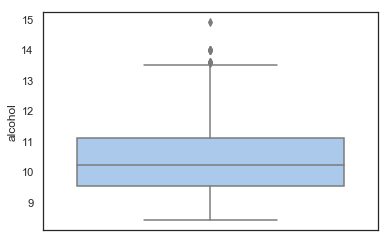

In [480]:
sns.boxplot(x=data["alcohol"],
            orient = 'v')

Pełniejszego obrazu może dostarczyć wyrysowanie swarm plotu.<br>
Z uwagi na dużą ilośc obserwacji, podzielmy wykresy względem quality:<br>

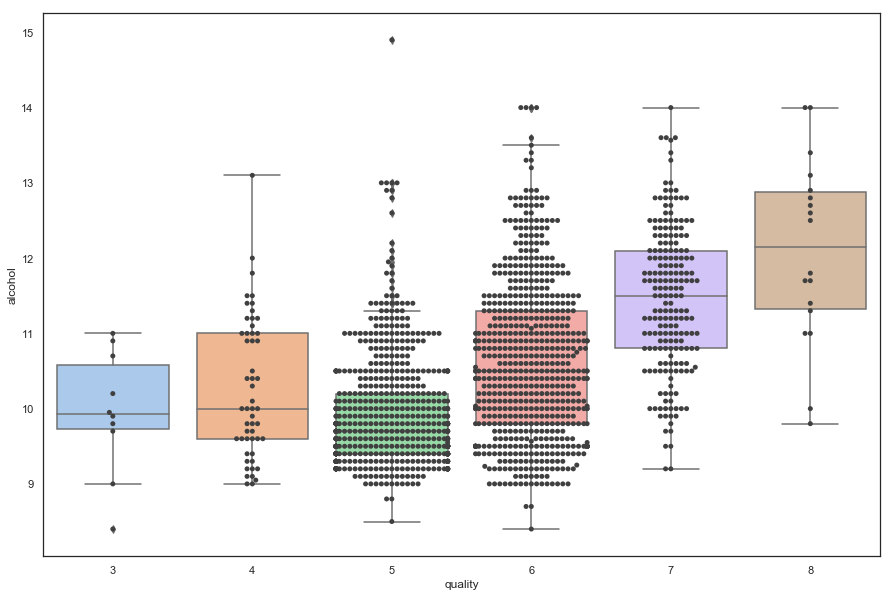

In [481]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data["quality"],
            y=data["alcohol"],
            orient = 'v')
sns.swarmplot(x=data["quality"],
            y=data["alcohol"],
            color=".25", #punkty ustalamy w jednym kolorze, inaczej mają te same kolory co pudełka dla quality
            orient = 'v')

Możemy również wyrysować wykresy dla każdej ze zmiennych:

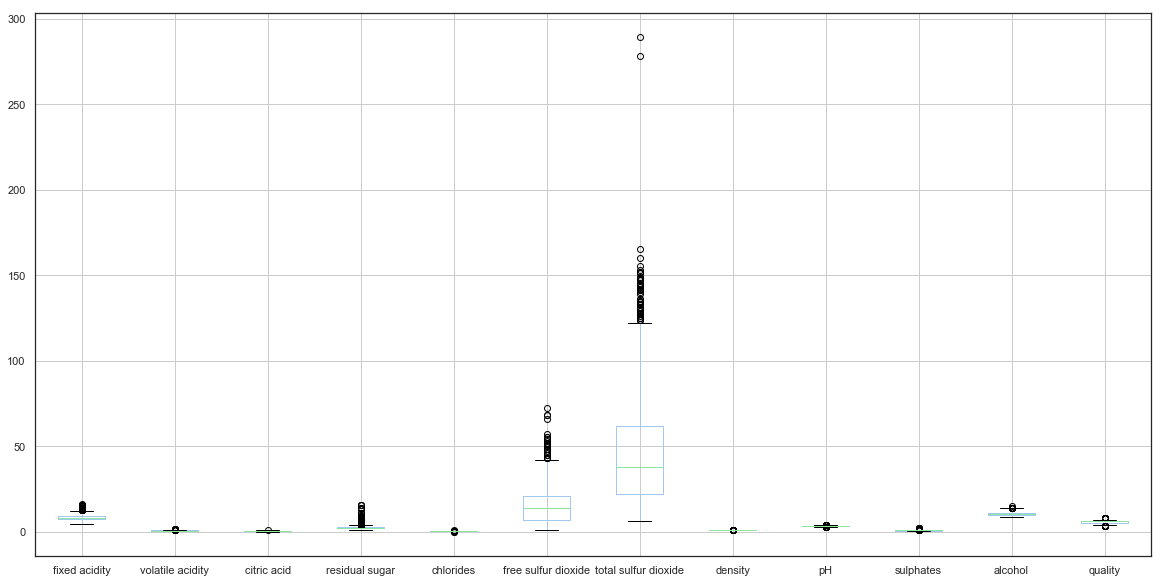

In [482]:
plt.figure(figsize = (20,10))
data.boxplot()

Z uwagi na zastosowaną skalę, wykres jest mało czytelny<br>
Lepszą widoczność daje wyrysowanie oddzielnych wykresów dla każdej ze zmiennej

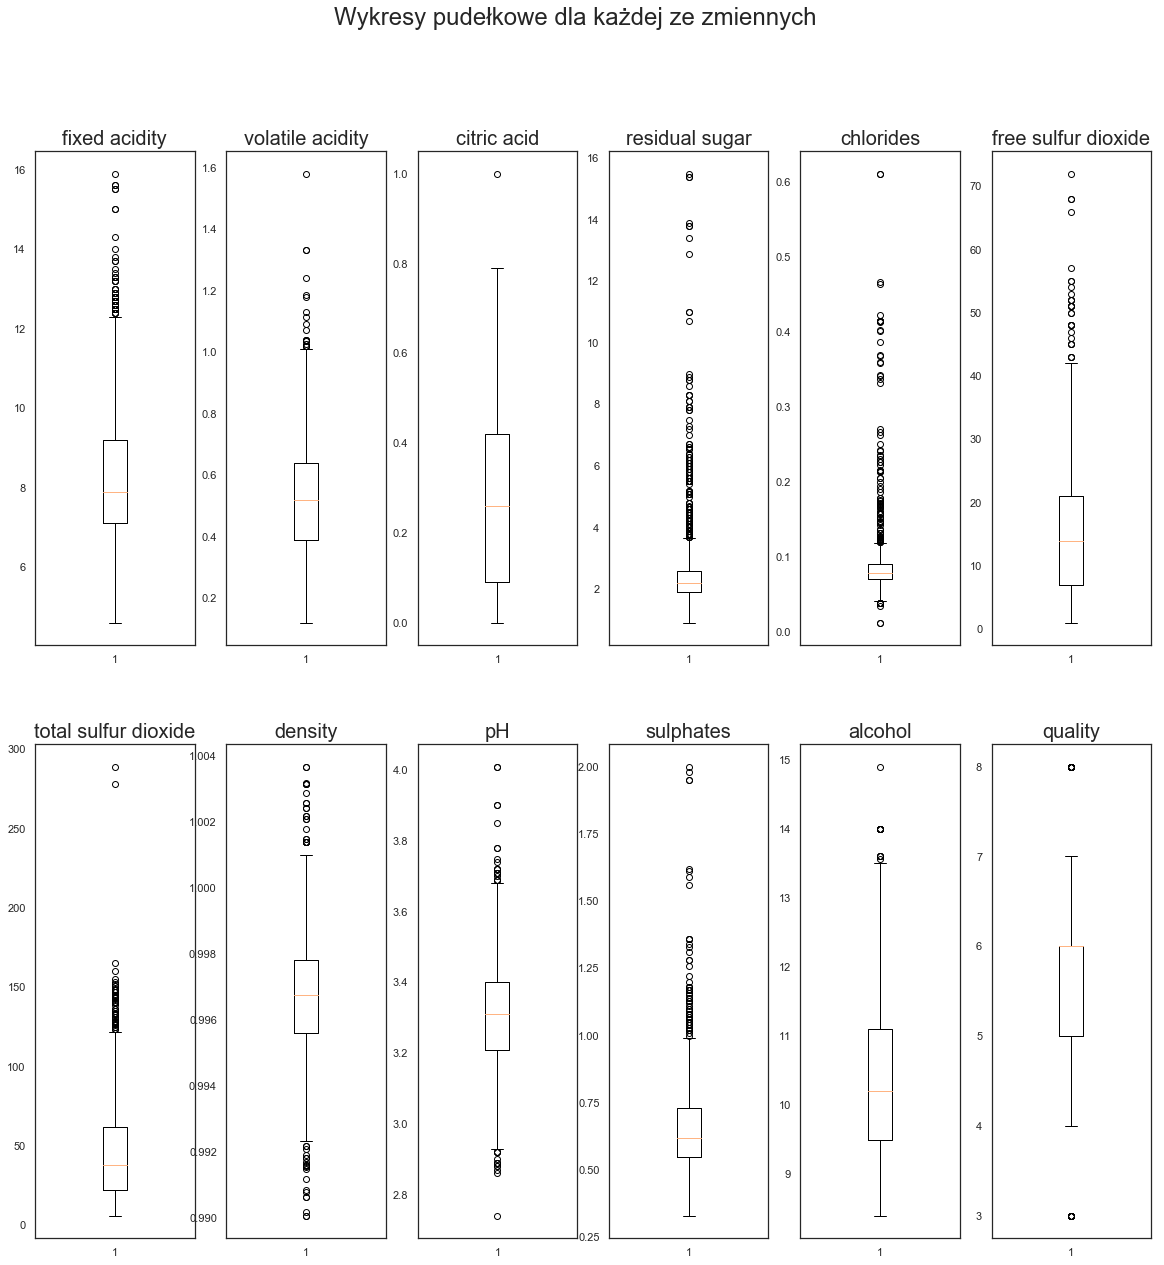

In [483]:
plt.figure(figsize=(20,20))

plt.suptitle('Wykresy pudełkowe dla każdej ze zmiennych',
             fontsize=24)

for n in range(1,data.shape[1]+1):
    plt.subplot(2,6,n)
    plt.boxplot(data.iloc[:,n-1])
    plt.title(data.columns[n-1],
              fontsize=20)
    

<a id='9'></a>

### Wartości Brakujące [&uarr;](#0)

Wartości puste można wykryć za pomocą data.info(). <br>
Można również stworzyć odpowiednią wizualizację:

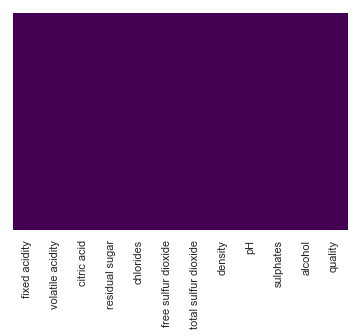

In [484]:
sns.heatmap(data.isnull(),
            cbar=False,
            yticklabels=False,
            cmap = 'viridis')

<a id='10'></a>

### Wykres punktowy [&uarr;](#0)

Używane pakiety pozwalają na wizualizację danych za pomocą wykresów punktowych:

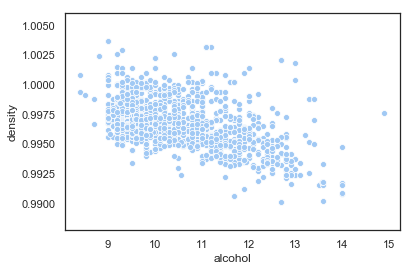

In [485]:
sns.scatterplot(data=data,
               x="alcohol",
               y="density")

Dodatkowe wymiary danych można przedstawić różnicując kolory, rozmiary i rodzaje punktów:

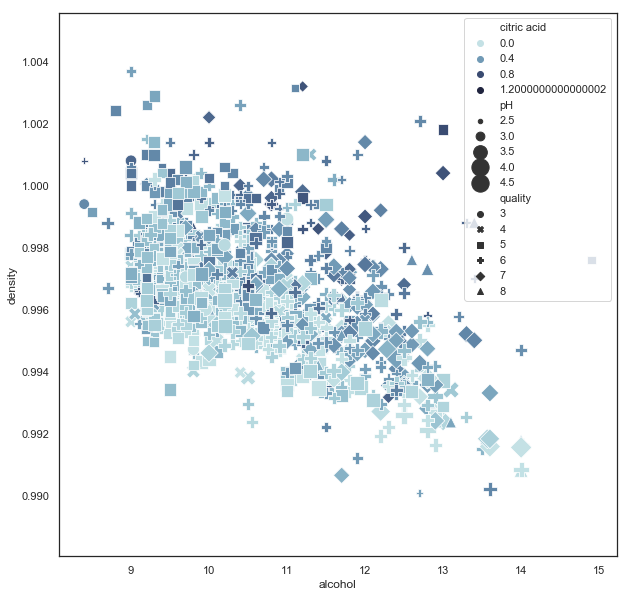

In [486]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="alcohol", 
                y="density",
                hue="citric acid",
                size="pH",
                sizes=(20, 300), #ten parametr kontroluje różnice w wielkości między punktami
                palette=cmap,
                style='quality',
                data=data)

Poniższy wykres prezentuje zestawienie wykresów punktowych dla różnych zmiennych:

Text(0.5, 0.98, 'Zestawienie cech wina')

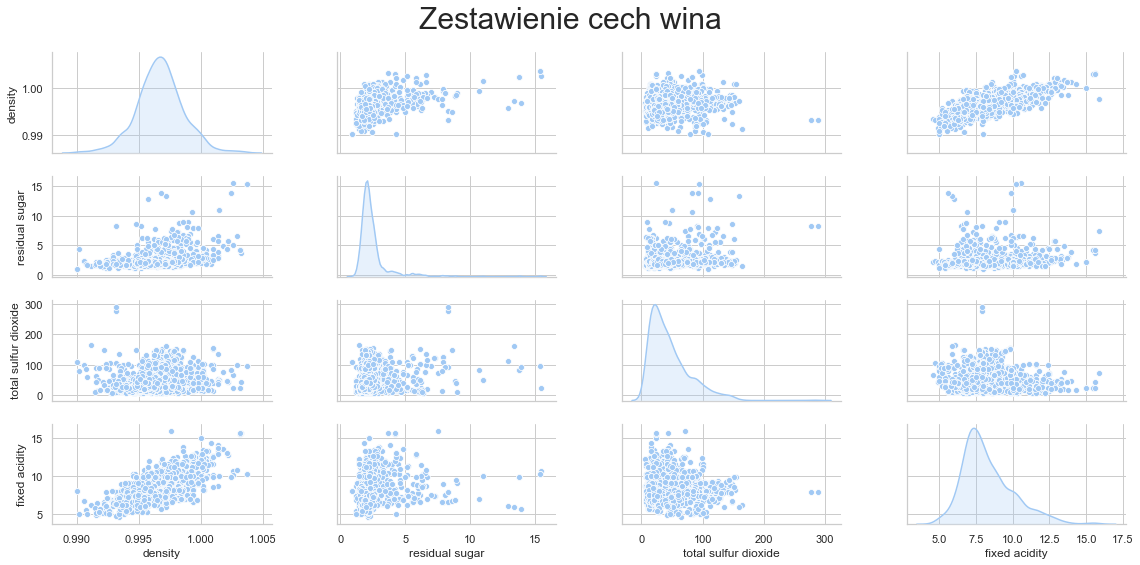

In [504]:
sns.set_style("whitegrid")
sns.pairplot(data[['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']],
                  height=2,
                  aspect=2,
                  diag_kind="kde")
plt.subplots_adjust(top=0.9, wspace=0.3)
plt.suptitle('Zestawienie cech wina', fontsize=30)

<a id='11'></a>

### Wykresy dwuzmiennowe [&uarr;](#0)

Interesującą alternatywą do wykresów punktowych są wykresy dwuzmiennowe (Bivariate Plot):

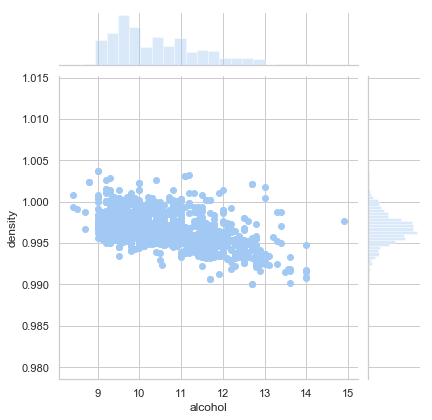

In [488]:
sns.jointplot(x="alcohol",
              y="density",
              data=data);

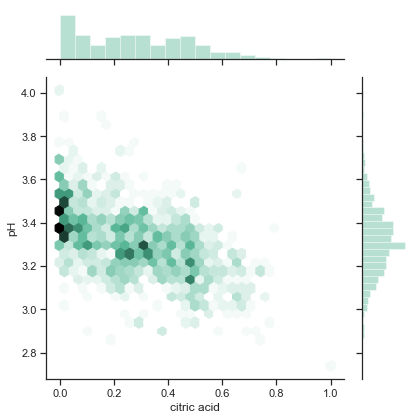

In [489]:
sns.set(style="ticks")
sns.jointplot(x="citric acid", y="pH",
              kind="hex",
              color="#4CB391",
              space=0.4,
              data=data)

Poniżej przykład wykresu "Kernel Density Estimation":

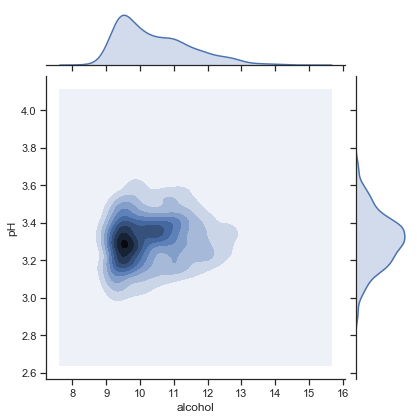

In [490]:
sns.jointplot(x="alcohol",
              y="pH",
              data=data,
              kind="kde");

Podobny efekt można uzyskać używają komendy kdeplot opisanej wyżej:

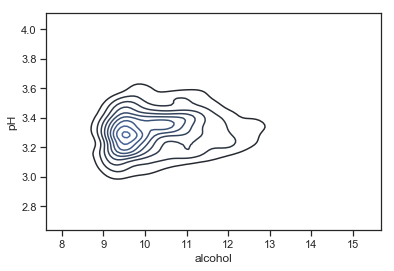

In [491]:
sns.kdeplot(data=data['alcohol'],
            data2=data['pH'])

<a id='12'></a>

### Wykresy skrzypcowe [&uarr;](#0)

Pakiet sns pozwala również na tworzenie wykresów skrzypcowych:<br>

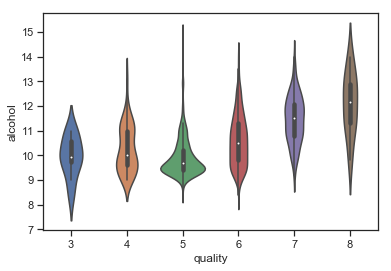

In [492]:
sns.violinplot(x="quality",
             y="alcohol",
             data=data)

Spróbujmy stworzyć wykres dla quality=5:

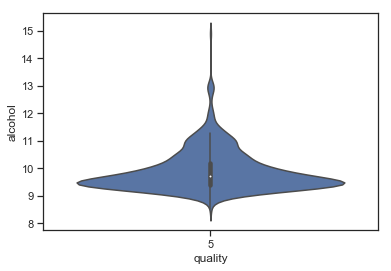

In [493]:
select_quality = data.loc[data['quality'] == 5]
sns.violinplot(x="quality",
             y="alcohol",
             data=select_quality)

Aby lepiej wykorzystać ich charakterystyki, stwórzmy nowe zmienne - Reviews i Power.<br>
Przyjmijmy, że dobre wino ma quality >=5 a słabe <5 (Reviews: Good/Bad):<br>

In [494]:
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 5:
        reviews.append('Bad')
    elif i > 5 and i <= 10:
        reviews.append('Good')
data['Reviews'] = reviews

Stwórzymy również zmienną, która będzie opisywać zawartość alkoholu w winie:

In [495]:
Power = []
for i in data['alcohol']:
    if i <= 9:
        Power.append('V.Weak')
    elif i > 9 and i <= 10:
        Power.append('Weak')
    elif i > 9 and i <= 11:
        Power.append('Moderate')
    elif i > 11 and i <= 13:
        Power.append('Strong')
    elif i > 13 and i <= 15:
        Power.append('V.Strong')
data['Power'] = Power

Nasz zbiór wygląda teraz tak:

In [496]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews,Power
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad,Weak
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bad,Weak
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bad,Weak
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good,Weak
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad,Weak


Stwórzmy teraz wykres skrzypcowy, który będzie opisywał wina pod kątem zmiennych Density, Reviews i Power:<br>

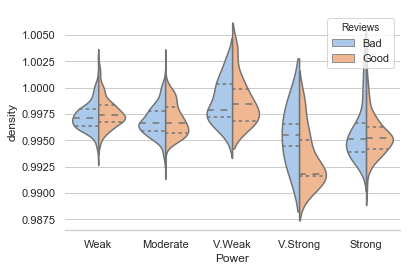

In [497]:
sns.set(style="whitegrid",
        palette="pastel",
        color_codes=True)

sns.violinplot(x="Power",
               y="density",
               hue="Reviews",
               split=True,
               inner="quart",
               data=data)
sns.despine(left=True)

Zbiór z nowymi zmiennymi możemy przedstawić na jednym wykresie:

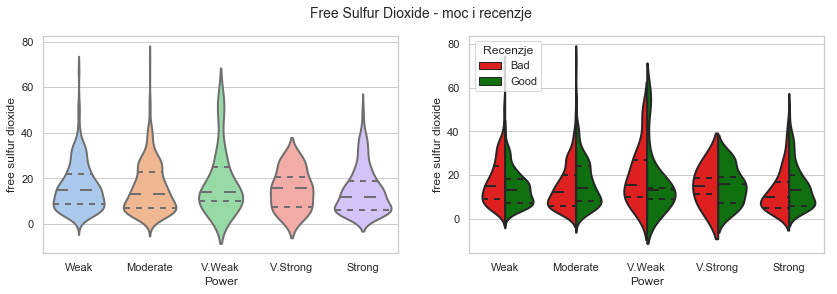

In [498]:
graph, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
graph.suptitle('Free Sulfur Dioxide - moc i recenzje', fontsize=14)


sns.violinplot(data=data, 
               x="Power",
               y="free sulfur dioxide",
               inner="quart",
               linewidth=2,
               ax=ax1)

sns.violinplot(data=data,
               x="Power", 
               y="free sulfur dioxide", 
               hue="Reviews", 
               split=True,     
               palette={"Good": "green", 
                        "Bad": "red"}, 
               inner="quart",
               linewidth=2,
               ax=ax2)

plt.legend(loc='upper left',
           title='Recenzje')

Stworzenie nowej dychotomicznej zmiennej pozwala na bardziej klarowne wizualizacje:

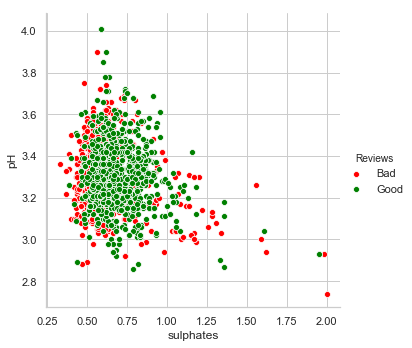

In [501]:
jp = sns.pairplot(data=data, 
                  x_vars=["sulphates"], 
                  y_vars=["pH"], 
                  height=5,
                  hue="Reviews",
                  palette={"Bad": "Red",
                           "Good": "Green"})

<a id='13'></a>

### Bibliografia [&uarr;](#0)

Seaborn - https://seaborn.pydata.org/index.html<br>
Pandas - https://pandas.pydata.org/<br>
Mathplotlib - https://matplotlib.org/<br>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002122BDDEE80>]],
      dtype=object)

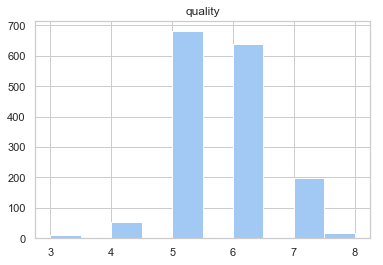

In [505]:
data.hist('quality')